for my code i used the TA code and my previous codes 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import math

In [2]:
small_data=pd.read_table('w11-data-small.tbl')
large_data=pd.read_table('w11-data-large.tbl')

/Users/leinaessakalli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
/Users/leinaessakalli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [3]:
small_data

,cabbage,asparagus,okra,potato,pear,banana,blackberry,juniper,honeydew,yam,...,scallion,peach,watermelon,kiwi,cayenne,plantain,orange,apricot,chard,type
0,1,85,17,214,174,2,86,0,25,96,...,2,133,112,101,189,33,39,0,191,1
1,203,17,11,221,159,129,50,368,105,259,...,236,63,136,43,52,147,27,209,122,7
2,1,25,166,101,69,0,33,3,1,41,...,1,88,8,1,21,0,54,1,61,0
3,197,107,28,97,36,32,8,122,157,32,...,424,32,101,96,86,231,113,170,109,7
4,0,49,1,204,10,320,103,2,33,57,...,140,94,96,35,8,383,76,2,87,3
5,60,63,110,110,31,2,321,490,194,49,...,0,28,150,183,134,273,196,224,64,5
6,1,113,81,230,184,525,49,0,2,130,...,75,463,112,2,25,5,128,2,77,2
7,172,146,45,48,57,3,124,89,2,31,...,3,7,151,0,107,2,148,447,68,4
8,391,75,82,34,8,0,403,286,1,142,...,2,123,161,0,78,0,36,73,54,4
9,0,20,28,124,223,614,24,1,72,25,...,174,57,115,364,49,80,163,0,53,3


In [4]:
#print(small_data.head()) #vizualise 
#the last col is TYPE lets remove this for now (not needed for PC analysis )
small_df=small_data.drop('type',axis=1)
small_X = small_df.values.astype(float)  #convert all counts as float 

N_small, G_small  = np.shape(small_X) #extract the number of genes/cells using the shape of the dataset 

print('number of cells for small dataset ',N_small)
print('number of genes for small dataset ',G_small)

#log transformation log(value+epsilon) with epsilon=1 , modify small_X
for cell in range(N_small):
    for gene in range(G_small):
        small_X[cell,gene] = np.log( small_X[cell,gene] + 1.0)
#small_X        
        

number of cells for small dataset  38
number of genes for small dataset  24


In [5]:
#same process on the large dataframe
#print(large_data.head())#vizualise
large_df=large_data.drop('type',axis=1)
large_X = large_df.values.astype(float)
N_large, G_large  = np.shape(large_X) 
print('number of cells for large dataset',N_large)
print('number of genes for large dataset',G_large)

for cell in range(N_large):
    for gene in range(G_large):
        large_X[cell,gene] = np.log( large_X[cell,gene] + 1.0)

number of cells for large dataset 1854
number of genes for large dataset 32


In [6]:
#this is the function i created for my previous PSET 
def svd(X):
  # Data matrix X
    n, m = X.shape

    data_centered=np.zeros(X.shape) #initialisation - same shape as initial 
    data_centered =X - np.mean(X, axis=0) #substract each element by the mean of its col 

    U, Sigma, Wt = np.linalg.svd(data_centered) #SVD computation 
    eigen_values= np.square(Sigma)/(n-1) #relationship sigma and eigen values 
    diagonal_matrix= np.diag(Sigma) #needed for after(matrix mulitplication )
    W_matrix=Wt.transpose() # transpose of the vcalue returned is the W matrix
    
    return U, Sigma,W_matrix ,eigen_values,diagonal_matrix,Wt,data_centered

In [7]:
U_small, Sigma_small,W_matrix_small ,eigen_values_small,diagonal_matrix_small,Wt,data_centered_small=svd(small_X)

In [8]:
#now lets select PC1 and PC2 from W 
Wq_small=W_matrix_small[:, [0,1]]
W_1_small=W_matrix_small[:, 0]
W_2_small=W_matrix_small[:, 1]
Yq_small=data_centered_small@Wq_small #projection using Yq=X*@Wq 
#print(Yq.shape) # check
Yq_1_small=Yq_small[:, [0]]
Yq_2_small=Yq_small[:, [1]]


In [9]:
U_large, Sigma_large ,W_matrix_large ,eigen_values_large,diagonal_matrix_large,Wt,data_centered_large=svd(large_X)

In [10]:
#now lets select PC1 and PC2 from W 
Wq_large=W_matrix_large[:, [0,1]]
W_1_large=W_matrix_large[:, 0]
W_2_large=W_matrix_large[:, 1]
Yq_large=data_centered_large@Wq_large #projection using Yq=X*@Wq 
#print(Yq.shape) # check

Yq_1_large=Yq_large[:, [0]]
Yq_2_large=Yq_large[:, [1]]

In [11]:
def visualise_PC(data_frame,Yq_1,Yq_2):
    Color_map = [ 'xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
     'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender',  'xkcd:cyan',    'xkcd:lime','xkcd:brown',  
    'xkcd:maroon', 'xkcd:olive',   'xkcd:navy', 'xkcd:peach','xkcd:green' ] #max 16 types of cells 
    number_of_cells= data_frame.shape[0]
    cell_type= list(data_frame['type']) #we will color the cell by the type,so get a list of type 
    for cell in range(number_of_cells):
        plt.plot(Yq_1[cell], Yq_2[cell], 'o', mfc='w', mec=Color_map[cell_type[cell]%16])
    plt.xlabel("PC1")
    plt.ylabel("PC2")


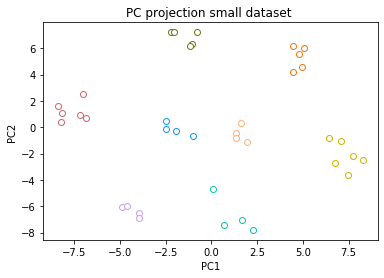

In [12]:
#small data set 
visualise_PC(small_data,Yq_1_small,Yq_2_small) 
plt.title('PC projection small dataset ')
plt.show()

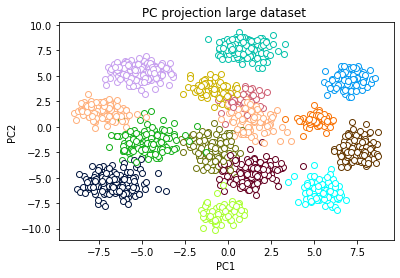

In [13]:
#large data set -takes longer time 
visualise_PC(large_data,Yq_1_large,Yq_2_large)
plt.title('PC projection large dataset ')
plt.show()

why PCA fails - What could have possibily gone wrong is that we need more than 2 Principal componements to explain the variance - 
eigenvalues plot 


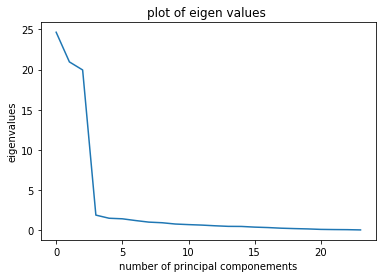

In [14]:
plt.plot(eigen_values_small,label = 'eigenvalues ')
plt.title('plot of eigen values ')
plt.xlabel('number of principal componements')
plt.ylabel('eigenvalues')
plt.show()

# part 2 


Lets try to implement T-sne on these dataset
We have true clustering in N dimensional space we define a probability matrix that describe all the relationship and then we try to find some coordindate in 2D space 

Tsne is also trying to define relationship between points but its different from PCA 
we gonna assign neighbhors 
P matrix(N*N) that describe the relationship between each point and every other point (probability distribution) 

and Q distribution also N*N but 2D space 
In the T-sne calculation we are trying to optimize (Match Q as closely to P as possible) KL is the mesure of divergence(or similarity) 
So again optimization problem 

1- LETS CALCULATE THE MATRIX P 
Pj|i is the probablity that a point j is i's Neighbor (using eclidian distance dij and sigma (how far are we willing to go far for neighbhors?)
pj|i=e(-dij/2*sigma^2) /NOMRLAISATION TERM (sum over all possible points)
we have to do that for all the pair of points 

we have one sigma for every point - (which is the size of the spherical Gaussian )
important point pj|i is different from pi|j

In [15]:
#step 1- Distance matrix is an N*N matrix (using as an argument the matrix in log space)
def calculate_dist(X):
     # declare empty D matrix
    n_dim=X.shape[0] 
    D = np.zeros((n_dim, n_dim))#initialisation
    for i in range(n_dim):
        for j in range(n_dim):
            D[i][j]= np.linalg.norm(X[i]-X[j], ord=None, axis=None) #distance between each cell 
            
    return D

In [16]:
D_small=calculate_dist(small_X)
D_large=calculate_dist(large_X)

In [17]:
# #check 
# #1-shape must be n*n
# print(D_small.shape)
# #2- diagonal must be 0
# print(D_small)

In [18]:
# #1-shape must be n*n
# print(D_large.shape)
# #2- diagonal must be 0
# print(D_large)

perplexity is the number of neighbors which is 2^H 
H is a function of pj|i (which itself depends on sigma 
                         because pj|i=e(-dij/2*sigma^2) /NOMRLAISATION TERM (sum over all possible points))
#step two - caluclate sigma - each row has a specific sigma 
we gonna pass sigma into a function that is optimize.biscet
the function that we want to pass is the diffrence between the true perplexity and the estimate perplexity and get the set of sigma(one for each cell) that set this function to 0(Which means that the estimate perplexity and the true perplexity are the same=GOOOAL)

In [19]:
def calculate_P_ji(sigma, D):
       
        # declare an empty matrix to populate P_j|i
    N=D.shape[0]
    P_ji=np.zeros((N,N)) #n*n MATRIX intialisation 
    for i in range(N):
        P_ji_num=np.zeros(N) #reintialise for each row 
        for j in range(N):
            if D[i][j]==0: 
                P_ji_num[j]=0
            else:
                P_ji_num[j]=np.exp(-D[i][j]**2/2/(sigma[i])**2)

        #sum over all the numerators of this row to get denominator 
        P_ji_den=np.sum(P_ji_num)
        # normalize p_ji by the denominator
        P_ji_norm= P_ji_num/P_ji_den
        
        #store this row into the variable that we will return at the end (for this row we cahnge the 0 with the values that we generated)
        for z in range(N):
            P_ji[i][z]=P_ji_norm[z] 
                        
    return P_ji

In [20]:
def perplexity_diff(sigma_i, D_i, perplexity_true):

    N=len(D_i)
    P_ji_num=np.zeros(N)
    
    # calculate the numerator of p_ji conditional probability
    # from D_i, a 1xN array of distances between point i
    # and all the other points, and our guess of sigma
    # sigma_i
    # calculate the numerator of p_ji conditional probability
    for j in range(N):
        if D_i[j]==0: 
            P_ji_num[j]=0
        else:
            P_ji_num[j]=np.exp(-D_i[j]**2/2/(sigma_i)**2)
    # np.sum p_ji to get the denominator
    P_ji_den=np.sum(P_ji_num)
    # normalize p_ji by the denominator
    P_ji= P_ji_num/P_ji_den
    
    # calculate the entropy 
    H=np.zeros(N)
    for j in range(N):
        if P_ji[j]==0:
            H[j]=0
        else:
            H[j]=-(P_ji[j])*(math.log(P_ji[j],2))
    H=np.sum(H) #this is the entropy 
    
    perplexity_estimated=2**H # calculate estimated perplexity 
    # calculate difference between perplexity_true and estimated
    difference=perplexity_true-perplexity_estimated
    return difference


In [21]:
def get_sigma_distance_matrix(X):
    D=calculate_dist(X)
    N=D.shape[0]
    sigma=np.zeros(N)

    perplexity_true=5 #random inital guess #this is because BEST PLOT OBTAINED IN QUESTION 3 was with perplexity =5 ( I did that question before)

    for i in range(N):

        lower_bound = 20  # random number >1 -inital guess 

        while perplexity_diff(lower_bound,D[i], perplexity_true) > 0: #test difference between the estimated and the real perplexity 
            #rhe perplexity function return the difference is this difference is higher than 0 , multiply the value of the lower_bound by 2 
            lower_bound *= 2 #multiply 

        upper_bound = lower_bound # set the upper bound initially
   

        while perplexity_diff(upper_bound,D[i], perplexity_true) <0:
            upper_bound /= 2 # divide

        sigma[i]=optimize.bisect(perplexity_diff, lower_bound, upper_bound,args=(D[i].flatten(),perplexity_true))

    return sigma, D

In [22]:
# PIJ given PJI  PIJ=(Pi|j+Pj|i)/2N- lecture notes

# Calculate pij based on
def cal_pij(P_ji,N):
    pij=np.zeros((N,N))
    for i in range(N):
        for j in range(N):
            if i!=j:
                pij[i][j]=(p_ji[i][j]+p_ji[j][i])/(2*N)
    return pij


In [23]:
# QIJ (Y-distance) 

def calculate_qij(Y_dist):
    N=len(Y_dist)
    
    qij_num=np.zeros((N,N)) #initialising 
   
    for i in range (N):
        for j in range (N):
            if Y_dist[i][j]==0:
                qij_num[i][j]=0
            else:
                qij_num[i][j]=1/(1+Y_dist[i][j]**2) #this is the numerator 
    
  
    #calculate the denominator-sum over numerators 
    qij_den=np.sum(qij_num)
   
    # normalize (using denominator)
    qij=qij_num/qij_den
    
    return qij 

In [24]:
def KL_dist(Y, Pij):

    # Note that: Y is a flattened array of dim 1 x N*2
    # Don't forget to reshape Y back for calculation of Q_ij
    # Calculate Q_ij using your calculate_qij function
    N=Pij.shape[0]
    Y=np.reshape(Y,(N,2)) 
    Y_distance_matrix=calculate_dist(Y)
    qij = calculate_qij(Y_distance_matrix)
    # Set up an array for the gradient of dim N x 2;
    gradient_matrix=np.zeros((N,2))

    # it is easier to flatten it later
    KL=0 #intialisation
    for i in range(N): 
        gradient=np.zeros(2)
        # Loop through j: 
        for j in range(N):
            # Calculate gradient for (i,j) and sum over all j's:
            #gradient[i]+= gradient for (i,j)
            gradient+=(Pij[i][j]-qij[i][j])*(Y[i]-Y[j])*((1+Y_distance_matrix[i][j]**2)**-1)
            # Calculate KL for each pair (i,) and sum over all 
            #i's and j's, taking care to avoid the zero entries
            #of the P_ij matrix.
           
            if i!=j:  #this is equivalent to asay pij different from 0 
                KL += Pij[i][j]*np.log(Pij[i][j]/qij[i][j])
        
        gradient_matrix[i]=gradient*4 # Scale the gradient by a factor of 4
   
        
    
    # Return the resulting KL and the *flattened* gradient
    return KL, gradient_matrix.flatten()

OK NOW LETS RUN IT on small data set first 

In [25]:
sigma_small,D_small=get_sigma_distance_matrix(small_X)
#len(sigma) # must be one by row
p_ji=calculate_P_ji(sigma_small,D_small)
#p_ji.shape #must be38*38 

Y=np.random.normal(0, 1e-4, (38,2)) #from lecture notes 
p_ij=cal_pij(p_ji,p_ji.shape[0])
kl_test=KL_dist(Y, p_ij)
#kl_test 

In [26]:
#takes a bit of time to run 
tsne=optimize.minimize(KL_dist,Y.flatten(),(p_ij),jac=True)
#tsne

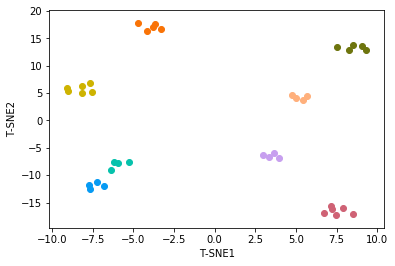

In [27]:
Color_map = [ 'xkcd:orange', 'xkcd:olive',     'xkcd:azure',    'xkcd:rose', 'xkcd:mustard', 
     'xkcd:peach',  'xkcd:turquoise', 'xkcd:lavender',  'xkcd:cyan',    'xkcd:lime','xkcd:brown',  
    'xkcd:maroon', 'xkcd:olive',   'xkcd:navy', 'xkcd:peach','xkcd:green' ] #max 16 types of cells 
cell_type_small= list(small_data['type'])
tsne_coords=tsne.x.reshape(38,2) #2D
for i in range(38):
    plt.scatter(tsne_coords[:,0][i], tsne_coords[:,1][i], color =  Color_map[cell_type_small[i]%16])
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')

plt.show()

# 3 using the canned t-SNE from scikit


In [28]:
from sklearn.manifold import TSNE #ok

In [29]:
#small_X.shape

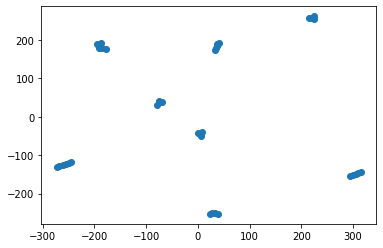

In [30]:
test_2_small=TSNE(n_components=2, perplexity=2.0).fit_transform(small_X)
small_tsne_2_1=test_2_small[:, 0]
small_tsne_2_2=test_2_small[:, 1]
plt.scatter(small_tsne_2_1,small_tsne_2_2)



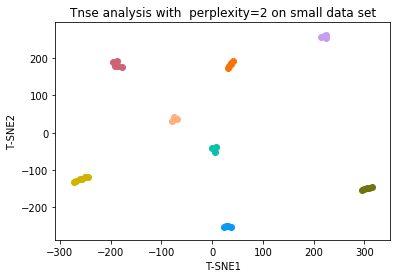

In [31]:
for i in range(N_small):
    plt.scatter(test_2_small[i,0], test_2_small[i,1],color= Color_map[cell_type_small[i]%16])

plt.title('Tnse analysis with  perplexity=2 on small data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

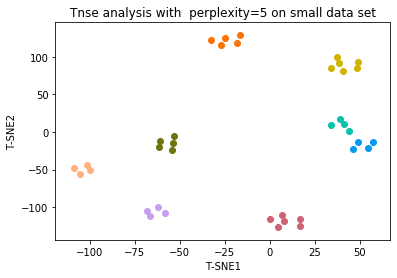

In [32]:
test_5_small=TSNE(n_components=2, perplexity=5).fit_transform(small_X)
for i in range(N_small):
    plt.scatter(test_5_small[i,0], test_5_small[i,1],color= Color_map[cell_type_small[i]%16])
plt.title('Tnse analysis with  perplexity=5 on small data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

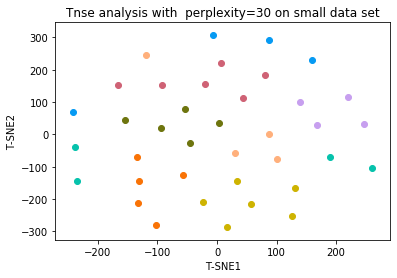

In [33]:
test_30_small=TSNE(n_components=2, perplexity=30).fit_transform(small_X)
for i in range(N_small):
    plt.scatter(test_30_small[i,0], test_30_small[i,1],color= Color_map[cell_type_small[i]%16])
plt.title('Tnse analysis with  perplexity=30 on small data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

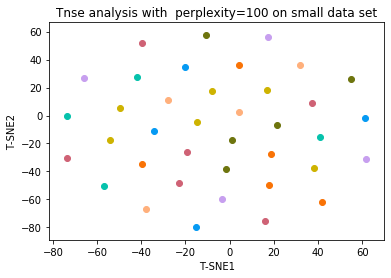

In [34]:
test_100_small=TSNE(n_components=2, perplexity=100).fit_transform(small_X)
for i in range(N_small):
    plt.scatter(test_100_small[i,0], test_100_small[i,1],color= Color_map[cell_type_small[i]%16])
plt.title('Tnse analysis with  perplexity=100 on small data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

In [35]:
cell_type_large= list(large_data['type'])

In [36]:
#takes a bit of time to run 
test_2_large=TSNE(n_components=2, perplexity=2).fit_transform(large_X)
test_5_large=TSNE(n_components=2, perplexity=5).fit_transform(large_X)
test_30_large=TSNE(n_components=2, perplexity=30).fit_transform(large_X)
test_100_large=TSNE(n_components=2, perplexity=100).fit_transform(large_X)

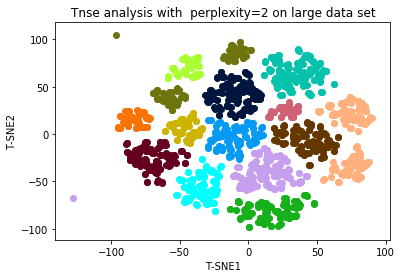

In [37]:
for i in range(N_large):
    plt.scatter(test_2_large[i,0], test_2_large[i,1],color= Color_map[cell_type_large[i]%16])
plt.xlabel("SNE-1")
plt.ylabel("SNE-2")

plt.title('Tnse analysis with  perplexity=2 on large data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

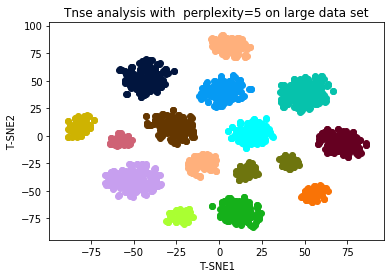

In [38]:
for i in range(N_large):
    plt.scatter(test_5_large[i,0], test_5_large[i,1],color= Color_map[cell_type_large[i]%16])

plt.title('Tnse analysis with  perplexity=5 on large data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

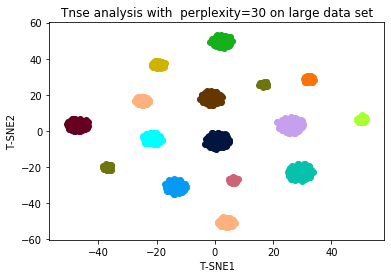

In [39]:
for i in range(N_large):
    plt.scatter(test_30_large[i,0], test_30_large[i,1],color= Color_map[cell_type_large[i]%16])

plt.title('Tnse analysis with  perplexity=30 on large data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

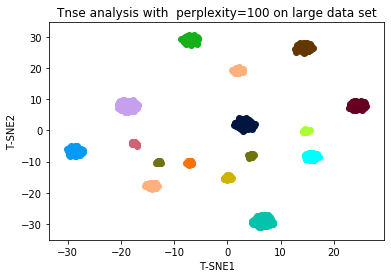

In [40]:
for i in range(N_large):
    plt.scatter(test_100_large[i,0], test_100_large[i,1],color= Color_map[cell_type_large[i]%16])

plt.title('Tnse analysis with  perplexity=100 on large data set')
plt.xlabel('T-SNE1')
plt.ylabel('T-SNE2')
plt.show()

best results with perplexity=5